# THE PROFESSOR PROPOSES

Submitted By - Subrat Kumar Nanda

Course - M.Tech 2 Yrs CSE WSPL in Data Science

Current Organization - Oracle India Pvt Lmt

### Package Installation

In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 5.4 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pkg_resources
pkg_resources.get_distribution("xlrd").version

'1.2.0'

In [ ]:
!pip install --upgrade --force-reinstall xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


### Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # plot
import seaborn as sns #plot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

Loading and Reading the data execluding top 3 rows 

In [ ]:
# Loading Data
data = pd.read_excel(r"/content/sample_data/W06586-XLS-ENG (1).xls",skiprows=[0,1,2])
data.head()


,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,I,SI2,G,AGS,V,V,3000,1
1,0.92,I,SI2,V,AGS,G,G,3000,1
2,0.82,F,SI2,I,GIA,X,X,3004,1
3,0.81,G,SI1,I,GIA,X,V,3004,1
4,0.90,J,VS2,V,GIA,V,V,3006,1


### Data Pre-Processing

In [ ]:
data.shape

(440, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Carat          440 non-null    float64
 1   Colour         440 non-null    object 
 2   Clarity        440 non-null    object 
 3   Cut            440 non-null    object 
 4   Certification  440 non-null    object 
 5   Polish         440 non-null    object 
 6   Symmetry       440 non-null    object 
 7   Price          440 non-null    int64  
 8   Wholesaler     440 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 31.1+ KB


In [ ]:
data = data.drop(["Wholesaler"], axis=1)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Carat,440.0,0.669250,0.379800,0.09,0.3,0.81,1.01,1.58
Price,440.0,1716.738636,1175.689127,160.00,520.0,2169.00,3012.50,3145.00


### Finding Missing data

In [ ]:
data.isnull().sum()

Carat            0
Colour           0
Clarity          0
Cut              0
Certification    0
Polish           0
Symmetry         0
Price            0
dtype: int64

Note: No Missing data in the dataSet.

### EDA

#### Evaluating Numeric features

In [ ]:
numerical_feats = data.dtypes[data.dtypes != 'object'].index
#categorical_feats = data.dtypes[data.dtypes == 'object'].index
print('Numerical features: {}'.format(numerical_feats))
print('Number of numerical features: {}'.format(len(numerical_feats)))


Numerical features: Index(['Carat', 'Price'], dtype='object')
Number of numerical features: 2


Text(0.5, 0.98, 'skew = -0.05 kurt = -1.83')

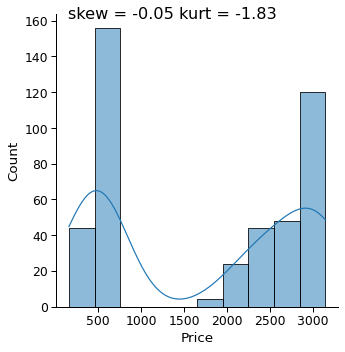

In [ ]:
#Examine distribution of target variable
plot=sns.displot(data['Price'], kde=True)
sub_plot_titles = 'skew = {0:.2f}'.format(data['Price'].skew()) + ' kurt = {0:.2f}'.format(data['Price'].kurt())
plot.fig.suptitle(sub_plot_titles)

In [ ]:
print('Min: ', data['Price'].min())
print('Q1: ', np.percentile(data['Price'],25))
print('Median: ', np.percentile(data['Price'],50))
print('Q3: ', np.percentile(data['Price'],75))
print('Max: ', data['Price'].max())

Min:  160
Q1:  520.0
Median:  2169.0
Q3:  3012.5
Max:  3145


Text(0.5, 0.98, 'skew = -0.05 kurt = -1.67')

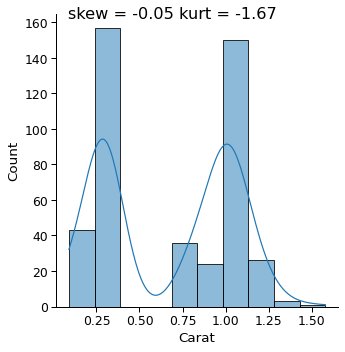

In [ ]:
# Carat 
plot=sns.displot(data['Carat'], kde=True)
sub_plot_titles = 'skew = {0:.2f}'.format(data['Carat'].skew()) + ' kurt = {0:.2f}'.format(data['Carat'].kurt())
plot.fig.suptitle(sub_plot_titles)

#### Evaluating categorical features

In [ ]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Colour', 'Clarity', 'Cut', 'Certification', 'Polish', 'Symmetry']


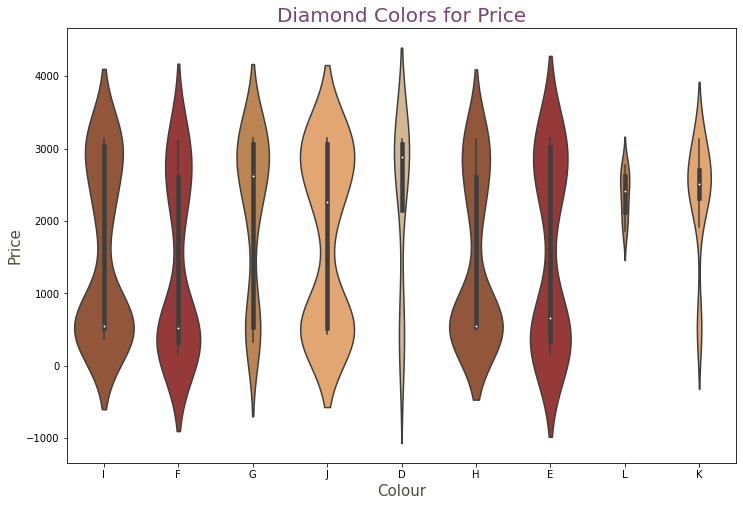

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="Colour",y="Price", data=data, palette=cols,scale= "count")
ax.set_title("Diamond Colors for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Colour", color="#4e4c39", fontsize = 15)
plt.show()

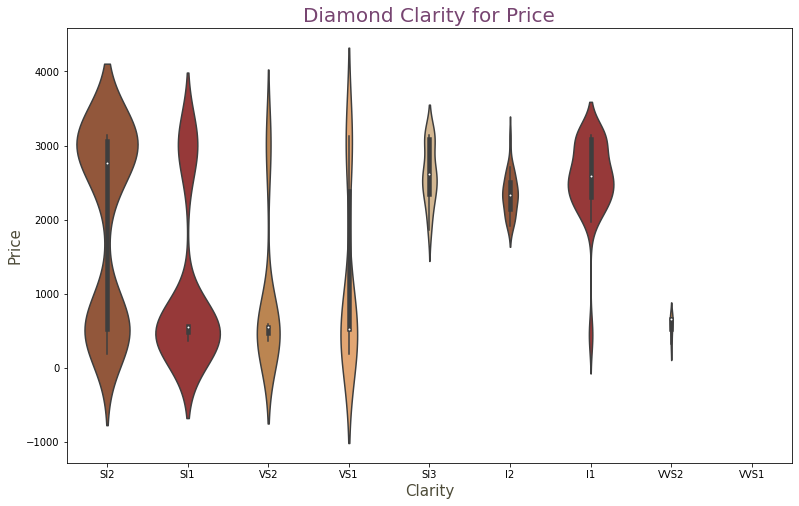

In [ ]:
plt.figure(figsize=(13,8))
ax = sns.violinplot(x="Clarity",y="Price", data=data, palette=cols,scale= "count")
ax.set_title("Diamond Clarity for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Clarity", color="#4e4c39", fontsize = 15)
plt.show()

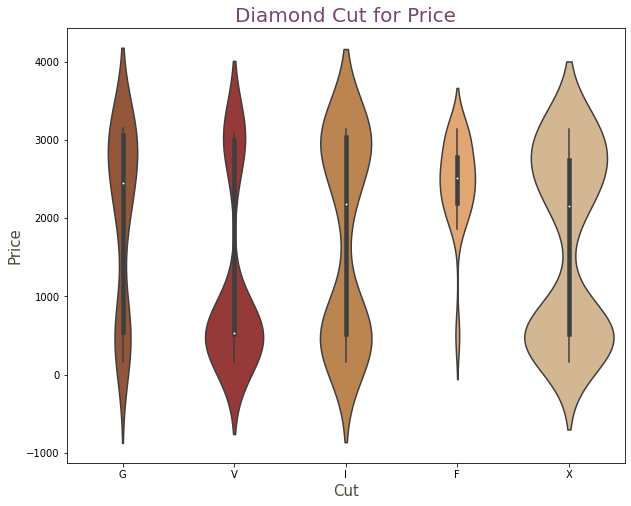

In [ ]:
plt.figure(figsize=(10,8))
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
ax = sns.violinplot(x="Cut",y="Price", data=data, palette=cols,scale= "count")
ax.set_title("Diamond Cut for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Cut", color="#4e4c39", fontsize = 15)
plt.show()

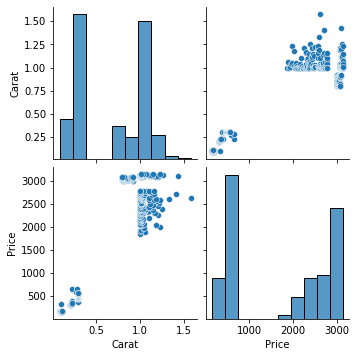

In [ ]:
#Doing Bivariate Analysis by examaning a pairplot  
sns.pairplot(data)

### Encoding Categorical Variables

In [ ]:
# Make copy to avoid changing original data 
label_data = data.copy()
label_data.head()

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price
0,0.92,I,SI2,G,AGS,V,V,3000
1,0.92,I,SI2,V,AGS,G,G,3000
2,0.82,F,SI2,I,GIA,X,X,3004
3,0.81,G,SI1,I,GIA,X,V,3004
4,0.90,J,VS2,V,GIA,V,V,3006


In [ ]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price
0,0.92,5,3,1,0,3,3,3000
1,0.92,5,3,3,0,1,1,3000
2,0.82,2,3,2,3,4,4,3004
3,0.81,3,2,2,3,4,3,3004
4,0.90,6,6,3,3,3,3,3006


### Correlation Matrix

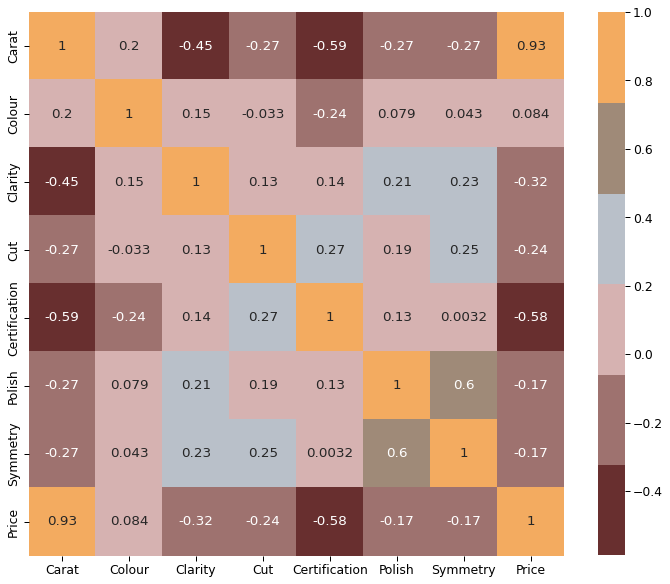

In [ ]:
# Examining correlation matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,cmap=cols,annot=True)

### MODEL BUILDING

#### Linear Regression

In [ ]:
# Assigning the featurs as X and trarget as y
x= label_data.drop(["Price"],axis =1)
y= label_data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [ ]:
#create model
reg=linear_model.LinearRegression()
#modeling
reg.fit(x_train,y_train)

#Predicted Y
y_hat=reg.predict(x_test)
#CorrectAnswer
y_ans=y_test

print("\n" + "*"*50 )
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(x_test, y_ans))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_ans)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_ans) ** 2))
print("R2-score: %.2f" % r2_score(y_ans , y_hat) )

In [ ]:
#Train Model
reg=linear_model.LinearRegression()
#modeling
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Predicted Y
y_hat=reg.predict(x_test)
#CorrectAnswer
y_ans=y_test

In [ ]:
print("\n" + "*"*50 )
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(x_test, y_ans))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_ans)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_ans) ** 2))
print("R2-score: %.2f" % r2_score(y_ans , y_hat) )



**************************************************
Variance score: 0.88
Mean absolute error: 326.49
Residual sum of squares (MSE): 163571.26
R2-score: 0.88


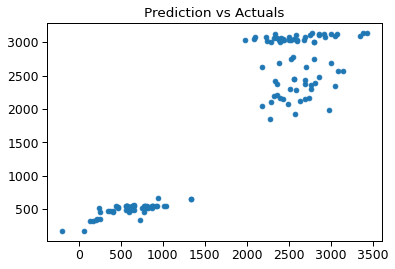

In [ ]:
#Examine results of prediction vs the actual price. A perfect linear line 
plt.scatter(y_hat,y_ans)
plt.title('Prediction vs Actuals')
plt.show()

In [ ]:
#Print model score (R^2)
print(f'Training score: {reg.score(x_train,y_train):.5f}')
print(f'Test score: {reg.score(x_test,y_test):.5f}')

Training score: 0.90618
Test score: 0.87552


#### Regression Model - Random Forest

In [ ]:
#Train Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Predict Test Dataset
predictions = model.predict(x_test)

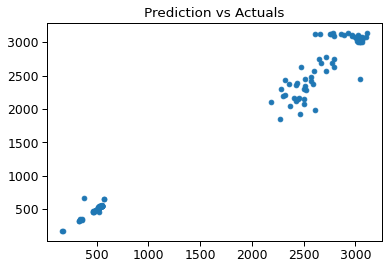

In [ ]:
#Examine results of prediction vs the actual price. A perfect linear line 
plt.scatter(predictions,y_test)
plt.title('Prediction vs Actuals')
plt.show()

In [ ]:
#Print model score (R^2)
print(f'Training score: {model.score(x_train,y_train):.5f}')
print(f'Test score: {model.score(x_test,y_test):.5f}')

Training score: 0.99652
Test score: 0.97939
